<a href="https://colab.research.google.com/github/JonathanM3Back/JonathanM3Back/blob/main/TrabalhoTitanicDt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#################
## IMPORTS NUMPY,MATPLOT,SEABORN E PANDAS
#################
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
#################
## IMPORTS SKLEARN
#################
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix, classification_report
#################
## IMPORTS DATASET FROM kagglehub
#################
import kagglehub

In [ ]:
### ETAPA 1 - Baixar o dataset selecionado
# Download latest version
path = kagglehub.dataset_download("yasserh/titanic-dataset")
nomeFileDataset = "Titanic-Dataset.csv"
## use para visualizar o path se quiser
##print("Path to dataset files:", path)

Using Colab cache for faster access to the 'titanic-dataset' dataset.


In [ ]:
### ETAPA 2 - Carregando o dataset no pandas para tratar os dados
print("Final path:", path+"/"+nomeFileDataset)
data = pd.read_csv(path + "/" + nomeFileDataset)


Final path: /kaggle/input/titanic-dataset/Titanic-Dataset.csv


Formato do Dataset: (891, 12)

Tipos das Colunas:


,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64



Estatísticas Descritivas:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


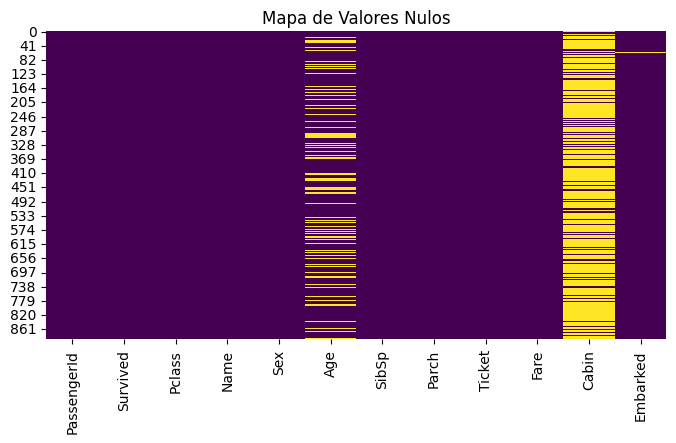

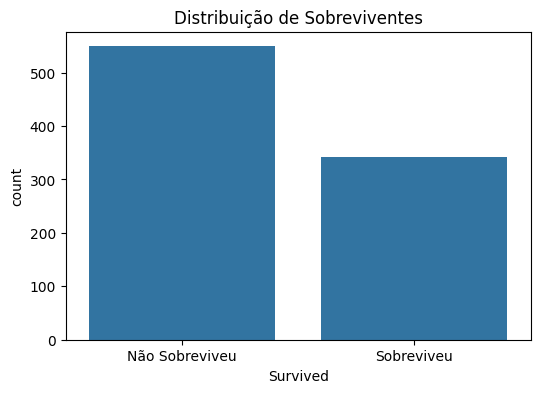

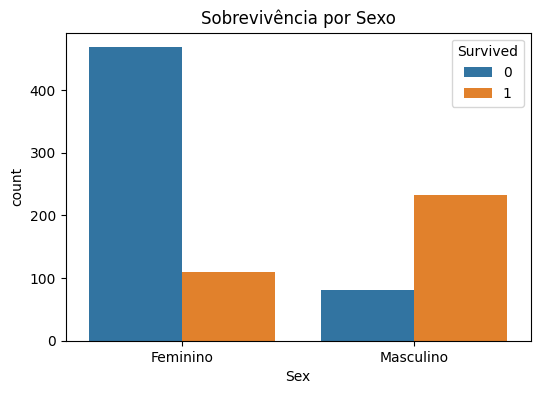

In [ ]:
###############################################################
# EDA - Análise Exploratória dos Dados
###############################################################

print("Formato do Dataset:", data.shape)
print("\nTipos das Colunas:")
display(data.dtypes)

print("\nEstatísticas Descritivas:")
display(data.describe(include="all"))

# ----------- Valores Nulos --------------
plt.figure(figsize=(8,4))
sns.heatmap(data.isnull(), cbar=False, cmap="viridis")
plt.title("Mapa de Valores Nulos")
plt.show()

# ----------- Contagem de Sobreviventes --------------
plt.figure(figsize=(6,4))
sns.countplot(data=data, x="Survived")
plt.title("Distribuição de Sobreviventes")
plt.xticks([0,1], ["Não Sobreviveu", "Sobreviveu"])
plt.show()

# ----------- Sobrevivência por Sexo --------------
plt.figure(figsize=(6,4))
sns.countplot(data=data, x="Sex", hue="Survived")
plt.title("Sobrevivência por Sexo")
plt.xticks([0,1], ["Feminino", "Masculino"])
plt.show()





In [ ]:

###############################################################
# ETAPA 3 - SEPARAR X E y
###############################################################
X = data.drop("Survived", axis=1)
y = data["Survived"]

num_cols = ["Age", "SibSp", "Parch", "Fare"]
cat_cols = ["Pclass", "Sex", "Embarked"]

In [ ]:
###############################################################
# ETAPA 4 - PRÉ-PROCESSAMENTO
###############################################################
num_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, num_cols),
        ("cat", cat_transformer, cat_cols)
    ]
)

In [ ]:
###############################################################
# ETAPA 5 - TREINO / TESTE
###############################################################
train_x, test_x, train_y, test_y = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

###############################################################
# TRATAMENTO SIMPLIFICADO PARA AS COLUNAS
###############################################################
train_x = train_x.drop(columns=["PassengerId","Name","Ticket","Cabin"],axis=1)

train_x.head(10)



,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
692,3,male,NaN,0,0,56.4958,S
481,2,male,NaN,0,0,0.0000,S
527,1,male,NaN,0,0,221.7792,S
855,3,female,18.0,0,1,9.3500,S
801,2,female,31.0,1,1,26.2500,S
652,3,male,21.0,0,0,8.4333,S
509,3,male,26.0,0,0,56.4958,S
557,1,male,NaN,0,0,227.5250,C
828,3,male,NaN,0,0,7.7500,Q
18,3,female,31.0,1,0,18.0000,S


In [ ]:
###############################################################
# ETAPA 6 - DEFINIR MODELOS
###############################################################
modelos = {
    "Logistic Regression": LogisticRegression(max_iter=800),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

In [ ]:
###############################################################
# ETAPA 7 - AVALIAÇÃO BÁSICA DE TODOS OS MODELOS
###############################################################
print("\n===== Avaliação Rápida dos Modelos =====")

resultados = []

for nome, m in modelos.items():
    pipe = Pipeline(steps=[
        ("preprocess", preprocessor),
        ("model", m)
    ])

    pipe.fit(train_x, train_y) ## Training!!
    pred = pipe.predict(test_x)

    acc = accuracy_score(test_y, pred)
    prec = precision_score(test_y, pred)
    f1 = f1_score(test_y, pred)

    resultados.append([nome, acc, prec, f1])

df_resultados = pd.DataFrame(resultados, columns=["Modelo", "Accuracy", "Precision", "F1"])
display(df_resultados.sort_values(by="F1", ascending=False))


===== Avaliação Rápida dos Modelos =====


,Modelo,Accuracy,Precision,F1
1,Random Forest,0.810056,0.777778,0.742424
0,Logistic Regression,0.804469,0.793103,0.724409
2,Gradient Boosting,0.793296,0.785714,0.704000


In [ ]:
###############################################################
# ETAPA 8 - GRIDSEARCH NO MELHOR MODELO
###############################################################

parametros_rf = {
    "model__n_estimators": [100, 200, 300],
    "model__max_depth": [5, 10, 15, None],
    "model__min_samples_split": [2, 5, 10],
    "model__min_samples_leaf": [1, 2, 4]
}
rf_pipe = Pipeline([
    ("preprocess", preprocessor),
    ("model", RandomForestClassifier())
])

grid = GridSearchCV(
    rf_pipe,
    parametros_rf,
    scoring="f1",
    n_jobs=-1,)

grid.fit(train_x, train_y)

print("\n===== MELHOR MODELO ENCONTRADO =====")
print("\nMelhor F1 Score:", grid.best_score_)


===== MELHOR MODELO ENCONTRADO =====

Melhor F1 Score: 0.7637482670286717


In [ ]:
###############################################################
# ETAPA 9 - AVALIAÇÃO FINAL DO MELHOR MODELO
###############################################################
best_model = grid.best_estimator_
final_pred = best_model.predict(test_x)

print("\n===== MÉTRICAS FINAIS =====")
print(classification_report(test_y, final_pred))


cm = confusion_matrix(test_y, final_pred)

plt.figure(figsize=(7, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Pred: Não Sobreviveu", "Pred: Sobreviveu"],
    yticklabels=["Real: Não Sobreviveu", "Real: Sobreviveu"]
)

plt.title("Matriz de Confusão – Titanic")
plt.xlabel("Predição do Modelo")
plt.ylabel("Valor Real")
plt.show()


NameError: name 'grid' is not defined

In [ ]:
###############################################################
# ETAPA 11 - FEATURE IMPORTANCE (SOMENTE PARA GB E RF) (modelo baseado em arvore)
###############################################################
modelo_final = best_model.named_steps["model"]
ohe = best_model.named_steps["preprocess"].named_transformers_["cat"].named_steps["ohe"]

# pegar nomes das dummies
cat_features = ohe.get_feature_names_out(cat_cols)
all_features = np.concatenate([num_cols, cat_features])

importancias = modelo_final.feature_importances_

df_imp = pd.DataFrame({
    "Feature": all_features,
    "Importância": importancias
}).sort_values(by="Importância", ascending=False)

print("\n===== FEATURE IMPORTANCES =====")
display(df_imp)

px.bar(df_imp, x="Feature", y="Importância", title="Importância das Features").show()


===== FEATURE IMPORTANCES =====


,Feature,Importância
3,Fare,0.219051
0,Age,0.208497
7,Sex_female,0.171042
8,Sex_male,0.162417
6,Pclass_3,0.057930
1,SibSp,0.043460
4,Pclass_1,0.039404
2,Parch,0.037719
5,Pclass_2,0.021388
11,Embarked_S,0.017439
